In [ ]:
import pandas as pd,numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
path='/content/drive/MyDrive/aero.csv'
data=pd.read_csv(path)

In [ ]:
data1=data.copy()
data1.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data1.tail(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


###**Initial Analysis to derive some insights which will help while moving forward**

**Checking if any null value is present**

In [ ]:
# data1['Product'].isnull().values.any()       # Output =False
# data1['Age'].isnull().values.any()           # Output =False
# data1['Gender'].isnull().values.any()        # Output =False
# data1['Education'].isnull().values.any()     # Output =False
# data1['MaritalStatus'].isnull().values.any() # Output =False
# data1['Usage'].isnull().values.any()         # Output =False
# data1['Fitness'].isnull().values.any()       # Output =False
# data1['Income'].isnull().values.any()        # Output =False
# data1['Miles'].isnull().values.any()         # Output =False

In [ ]:
data1.shape

(180, 9)

In [ ]:
data1.size

1620

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
round(data1.describe(),2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


In [ ]:
x=data1['Product'].nunique()
y=data1['Product'].value_counts()
print(f"No of unique product is: {x},\n\nDifferent types of Product is:\n{y} ")

No of unique product is: 3,

Different types of Product is:
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64 


In [ ]:
data1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
a=data1['Gender'].value_counts()
a0=data1["MaritalStatus"].value_counts()
print(f"Different Genders with count:\n{a}\n\nMarital Status with count:\n{a0}")

Different Genders with count:
Male      104
Female     76
Name: Gender, dtype: int64

Marital Status with count:
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


<ipython-input-280-7eae136a046e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


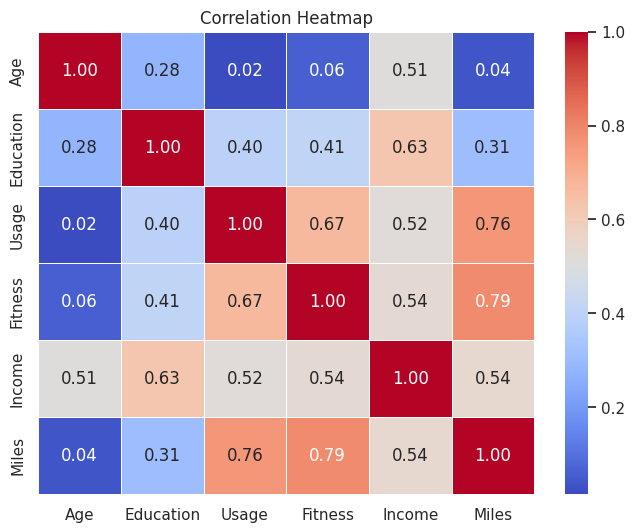

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

###**Checking for Outliers**

**Outliers in General**

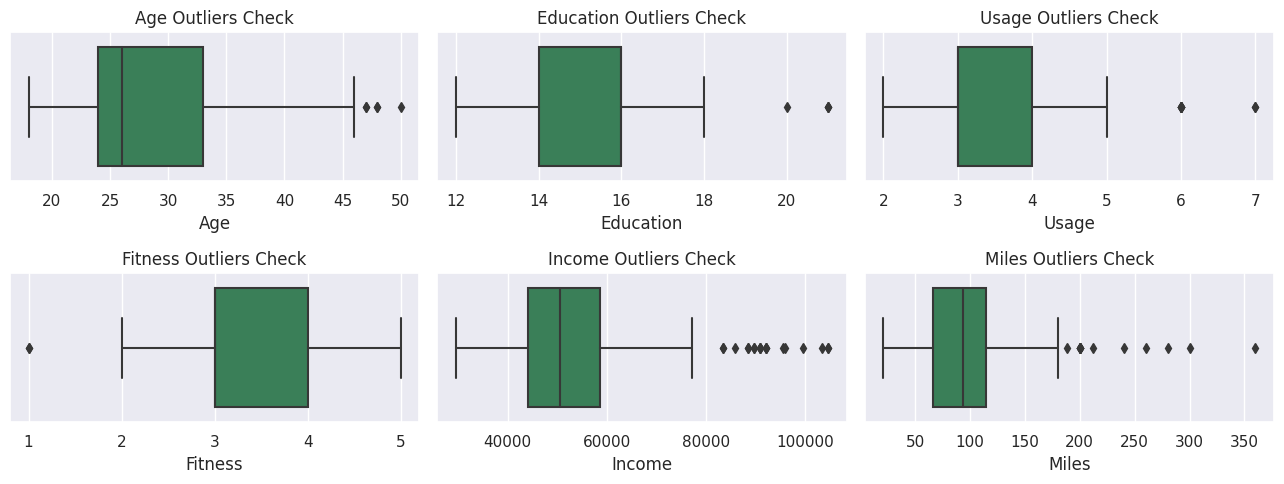

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 5))

sns.boxplot(data=data1,x='Age', ax=axes[0,0],color='seagreen')
axes[0,0].set_xlabel('Age')
axes[0,0].set_title('Age Outliers Check')

sns.boxplot(data=data1,x='Education', ax=axes[0,1],color='seagreen')
axes[0,1].set_xlabel('Education')
axes[0,1].set_title('Education Outliers Check')

sns.boxplot(data=data1,x='Usage', ax=axes[0,2],color='seagreen')
axes[0,2].set_xlabel('Usage')
axes[0,2].set_title('Usage Outliers Check')

sns.boxplot(data=data1,x='Fitness', ax=axes[1,0],color='seagreen')
axes[1,0].set_xlabel('Fitness')
axes[1,0].set_title('Fitness Outliers Check')

sns.boxplot(data=data1,x='Income', ax=axes[1,1],color='seagreen')
axes[1,1].set_xlabel('Income')
axes[1,1].set_title('Income Outliers Check')

sns.boxplot(data=data1,x='Miles', ax=axes[1,2],color='seagreen')
axes[1,2].set_xlabel('Miles')
axes[1,2].set_title('Miles Outliers Check')


plt.tight_layout()

# Show the subplots
plt.show()

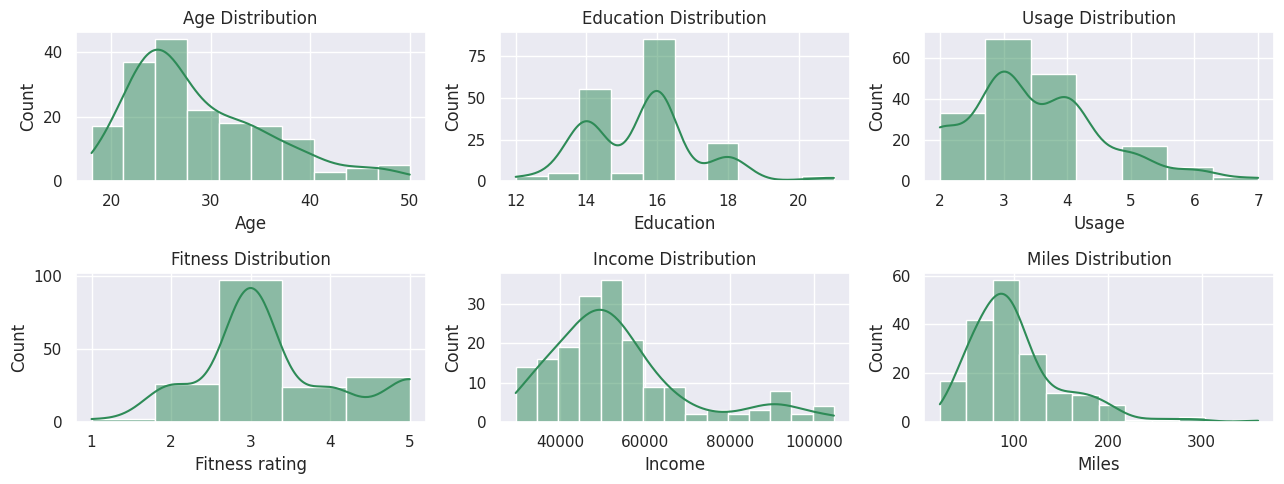

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 5))

sns.histplot(data1['Age'],kde=True, bins=10, ax=axes[0,0],color='seagreen')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Age Distribution')

sns.histplot(data1['Education'], bins=10,kde='True', ax=axes[0,1],color='seagreen')
axes[0,1].set_xlabel('Education')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Education Distribution')

sns.histplot(data1['Usage'], bins=7,kde='True', ax=axes[0,2],color='seagreen')
axes[0,2].set_xlabel('Usage')
axes[0,2].set_ylabel('Count')
axes[0,2].set_title('Usage Distribution')

sns.histplot(data1['Fitness'], bins=5,kde='True', ax=axes[1,0],color='seagreen')
axes[1,0].set_xlabel('Fitness rating')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Fitness Distribution')

sns.histplot(data1['Income'],kde='True',bins=15, ax=axes[1,1],color='seagreen')
axes[1,1].set_xlabel('Income')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Income Distribution')

sns.histplot(data1['Miles'], bins=12,kde='True', ax=axes[1,2],color='seagreen')
axes[1,2].set_xlabel('Miles')
axes[1,2].set_ylabel('Count')
axes[1,2].set_title('Miles Distribution')

# Adjust subplot layout
plt.tight_layout()

# Show the subplots
plt.show()


**Color Coding which is to be used**

In [ ]:
medium_purple= (147/255, 112/255, 219/255) #For KP281
dark_slate_blue= (123/255, 104/255, 238/255) #For KP481
slate_blue = (106/255,90/255, 205/255) #For KP781

**Checking for outliner in age for all 3 types of products**

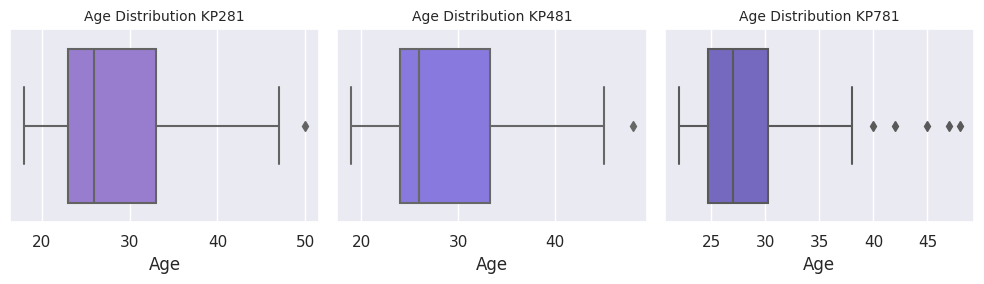

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.boxplot(data1[data1['Product']=="KP281"],x='Age', ax=axes[0],color=medium_purple)
axes[0].set_xlabel('Age')
axes[0].set_title('Age Distribution KP281',size=10)

sns.boxplot(data1[data1['Product']=="KP481"],x='Age', ax=axes[1],color=dark_slate_blue)
axes[1].set_xlabel('Age')
axes[1].set_title('Age Distribution KP481',size=10)

sns.boxplot(data1[data1['Product']=="KP781"],x='Age', ax=axes[2],color=slate_blue)
axes[2].set_xlabel('Age')
axes[2].set_title('Age Distribution KP781',size=10)

plt.tight_layout()

# Show the subplots
plt.show()

**Outliers in Education for all different product**

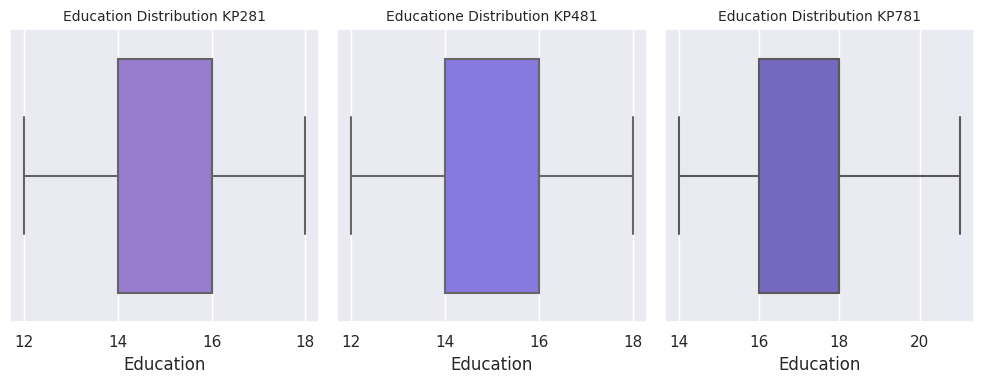

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))


sns.boxplot(data1[data1['Product']=="KP281"],x='Education', ax=axes[0],color=medium_purple)
axes[0].set_xlabel('Education')
axes[0].set_title('Education Distribution KP281',size=10)

sns.boxplot(data1[data1['Product']=="KP481"],x='Education', ax=axes[1],color=dark_slate_blue)
axes[1].set_xlabel('Education')
axes[1].set_title('Educatione Distribution KP481',size=10)

sns.boxplot(data1[data1['Product']=="KP781"],x='Education', ax=axes[2],color=slate_blue)
axes[2].set_xlabel('Education')
axes[2].set_title('Education Distribution KP781',size=10)

plt.tight_layout()

# Show the subplots
plt.show()

**Ouliners in usage for Different Product**

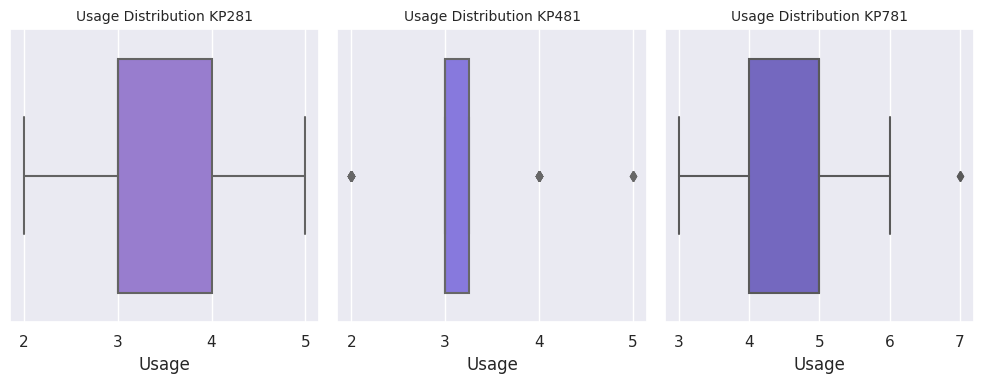

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

sns.boxplot(data1[data1['Product']=="KP281"],x='Usage', ax=axes[0],color=medium_purple)
axes[0].set_xlabel('Usage')
axes[0].set_title('Usage Distribution KP281',size=10)

sns.boxplot(data1[data1['Product']=="KP481"],x='Usage', ax=axes[1],color=dark_slate_blue)
axes[1].set_xlabel('Usage')
axes[1].set_title('Usage Distribution KP481',size=10)

sns.boxplot(data1[data1['Product']=="KP781"],x='Usage', ax=axes[2],color=slate_blue)
axes[2].set_xlabel('Usage')
axes[2].set_title('Usage Distribution KP781',size=10)

plt.tight_layout()

# Show the subplots
plt.show()

**Checking for outliers In fitenss for different product**

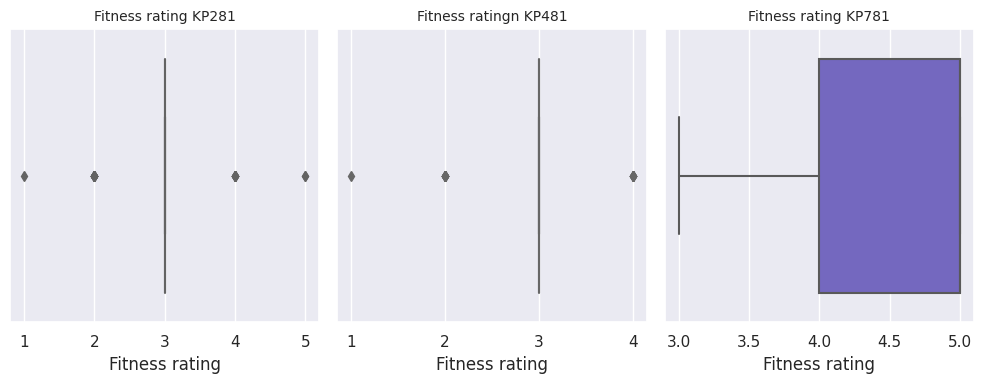

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))


sns.boxplot(data1[data1['Product']=="KP281"],x='Fitness', ax=axes[0],color=medium_purple)
axes[0].set_xlabel('Fitness rating')
axes[0].set_title('Fitness rating KP281',size=10)

sns.boxplot(data1[data1['Product']=="KP481"],x='Fitness', ax=axes[1],color=dark_slate_blue)
axes[1].set_xlabel('Fitness rating')
axes[1].set_title('Fitness ratingn KP481',size=10)

sns.boxplot(data1[data1['Product']=="KP781"],x='Fitness', ax=axes[2],color=slate_blue)
axes[2].set_xlabel('Fitness rating')
axes[2].set_title('Fitness rating KP781',size=10)

plt.tight_layout()

# Show the subplots
plt.show()

**Checking for outliner in Income for all 3 types of products**

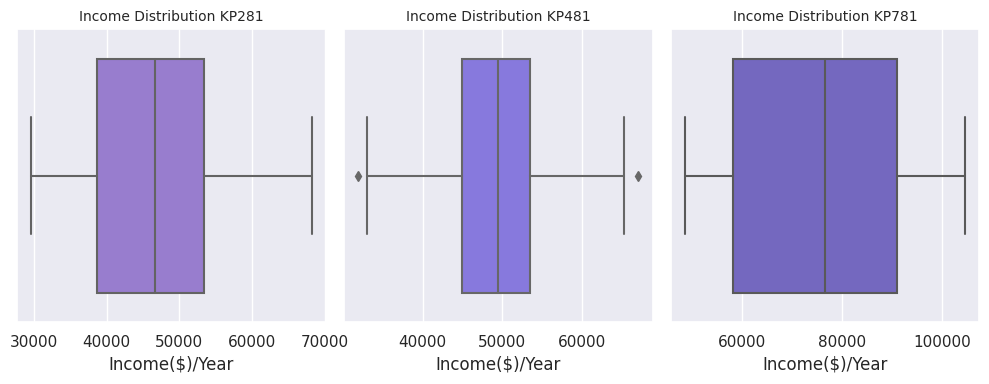

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))


sns.boxplot(data1[data1['Product']=="KP281"],x='Income', ax=axes[0],color=medium_purple)
axes[0].set_xlabel('Income($)/Year')
axes[0].set_title('Income Distribution KP281',size=10)

sns.boxplot(data1[data1['Product']=="KP481"],x='Income', ax=axes[1],color=dark_slate_blue)
axes[1].set_xlabel('Income($)/Year')
axes[1].set_title('Income Distribution KP481',size=10)

sns.boxplot(data1[data1['Product']=="KP781"],x='Income', ax=axes[2],color=slate_blue)
axes[2].set_xlabel('Income($)/Year')
axes[2].set_title('Income Distribution KP781',size=10)

plt.tight_layout()

# Show the subplots
plt.show()

**Outlier in Miles for different Products**

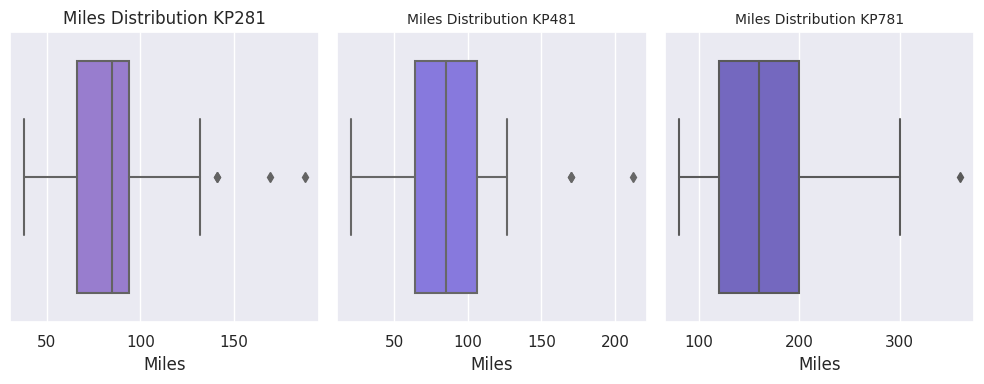

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

sns.boxplot(data1[data1['Product']=="KP281"],x='Miles', ax=axes[0],color=medium_purple)
axes[0].set_xlabel('Miles')
axes[0].set_title('Miles Distribution KP281')

sns.boxplot(data1[data1['Product']=="KP481"],x='Miles', ax=axes[1],color=dark_slate_blue)
axes[1].set_xlabel('Miles')
axes[1].set_title('Miles Distribution KP481',size=10)

sns.boxplot(data1[data1['Product']=="KP781"],x='Miles', ax=axes[2],color=slate_blue)
axes[2].set_xlabel('Miles')
axes[2].set_title('Miles Distribution KP781',size=10)

plt.tight_layout()

# Show the subplots
plt.show()

**Modification in the Dataset according to outliers**

###**Categorizing income in Low(<=$50000), average(>50000 and <= 80000), and High(>80000)**

In [ ]:
data1['Income_Category']=data1['Income']
data1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Category
0,KP281,18,Male,14,Single,3,4,29562,112,29562
1,KP281,19,Male,15,Single,2,3,31836,75,31836
2,KP281,19,Female,14,Partnered,4,3,30699,66,30699
3,KP281,19,Male,12,Single,3,3,32973,85,32973
4,KP281,20,Male,13,Partnered,4,2,35247,47,35247


In [ ]:
def replace(x):
  if x<=50000:
    return 'Low_Income'
  elif x >50000 and x<=80000:
    return 'Average_Income'
  else:
    return 'High_Income'

In [ ]:
data1['Income_Category'] = data1['Income_Category'].apply(replace)
data2=data1.copy()

###**Categorizing Miles run in Short(<=100 miles),Marathon(>100 and <=180 miles) and Ultra_Marathon(>180 miles)**

In [ ]:
data2['Miles_cat']=data2['Miles']
data2.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Category,Miles_cat
0,KP281,18,Male,14,Single,3,4,29562,112,Low_Income,112
1,KP281,19,Male,15,Single,2,3,31836,75,Low_Income,75
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low_Income,66
3,KP281,19,Male,12,Single,3,3,32973,85,Low_Income,85
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low_Income,47


In [ ]:
def instead(y):
  if y<=100:
    return 'Short'
  elif y >100 and y<=180:
    return 'Marathonr'
  else:
    return 'Ultra_Marathon'

In [ ]:
data2['Miles_cat'] = data2['Miles_cat'].apply(instead)
data3=data2.copy()

In [ ]:
data3.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Category,Miles_cat
0,KP281,18,Male,14,Single,3,4,29562,112,Low_Income,Marathonr
1,KP281,19,Male,15,Single,2,3,31836,75,Low_Income,Short
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low_Income,Short
3,KP281,19,Male,12,Single,3,3,32973,85,Low_Income,Short
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low_Income,Short


###**Categorozing age in Stage1(<=26 years), Stage2(>26 and <=33 year) and Stage3(>33 years)**

In [ ]:
data3['Age_dis']=data3['Age']
data3.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Category,Miles_cat,Age_dis
0,KP281,18,Male,14,Single,3,4,29562,112,Low_Income,Marathonr,18
1,KP281,19,Male,15,Single,2,3,31836,75,Low_Income,Short,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low_Income,Short,19
3,KP281,19,Male,12,Single,3,3,32973,85,Low_Income,Short,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low_Income,Short,20


In [ ]:
def inplace(z):
  if z<=26:
    return 'Stage1'
  elif z >26 and z<=33:
    return 'Stage2'
  else:
    return 'Stage3'

In [ ]:
data3['Age_dis'] = data3['Age_dis'].apply(inplace)
data4=data3.copy()

###**Data After Modification**

In [ ]:
data4.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Category,Miles_cat,Age_dis
0,KP281,18,Male,14,Single,3,4,29562,112,Low_Income,Marathonr,Stage1
1,KP281,19,Male,15,Single,2,3,31836,75,Low_Income,Short,Stage1
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low_Income,Short,Stage1
3,KP281,19,Male,12,Single,3,3,32973,85,Low_Income,Short,Stage1
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low_Income,Short,Stage1


<ipython-input-301-da0c65bb15fb>:16: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


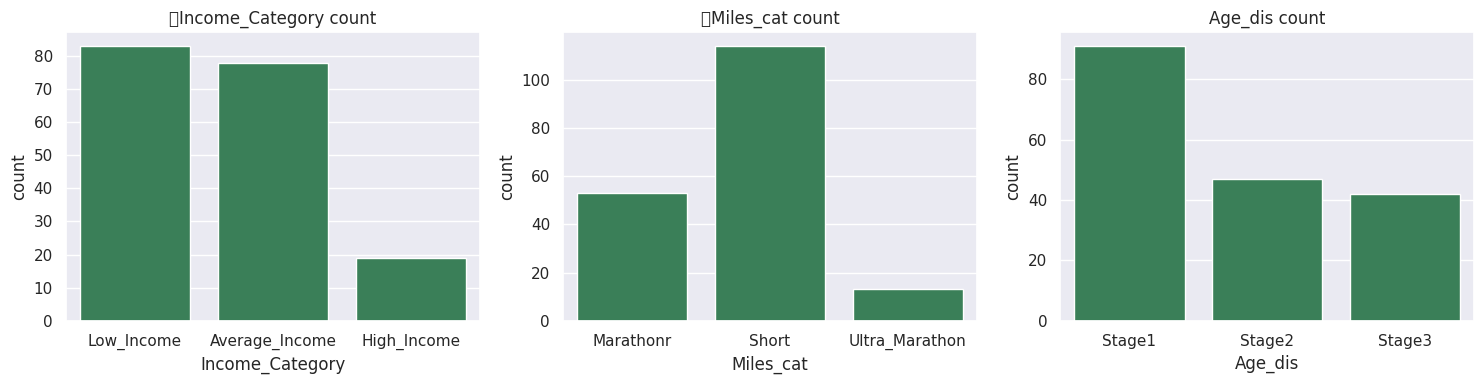

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,4))
sns.set(style='darkgrid')

sns.countplot(data=data4,x='Income_Category', ax=axes[0],color='seagreen')
axes[0].set_xlabel('Income_Category')
axes[0].set_title('	Income_Category count')

sns.countplot(data=data4,x='Miles_cat', ax=axes[1],color='seagreen')
axes[1].set_xlabel('Miles_cat')
axes[1].set_title('	Miles_cat count')

sns.countplot(data=data4,x='Age_dis', ax=axes[2],color='seagreen')
axes[2].set_xlabel('Age_dis')
axes[2].set_title('Age_dis count')

plt.tight_layout()
plt.show()


###**Probabilty setup**

In [ ]:
data4.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Category,Miles_cat,Age_dis
0,KP281,18,Male,14,Single,3,4,29562,112,Low_Income,Marathonr,Stage1
1,KP281,19,Male,15,Single,2,3,31836,75,Low_Income,Short,Stage1
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low_Income,Short,Stage1
3,KP281,19,Male,12,Single,3,3,32973,85,Low_Income,Short,Stage1
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low_Income,Short,Stage1


In [ ]:
data40=data4.copy()

In [ ]:
data5=data4[data4['Gender']=='Male']
data6=data4[data4['Gender']=='Female']

###**Based on Data present,probabilty of a random person buying any one product.**

In [ ]:
data400=pd.crosstab(data40['Product'],data40['Product'],values='Product',aggfunc='count',margins=True)
data400.fillna(0,inplace=True)
data400

Product,KP281,KP481,KP781,All
Product,,,,
KP281,80.0,0.0,0.0,80
KP481,0.0,60.0,0.0,60
KP781,0.0,0.0,40.0,40
All,80.0,60.0,40.0,180


In [ ]:
x=data400.loc['KP281','KP281']/data400.loc['All','All']
x=round(x,2)
x0=data400.loc['KP481','KP481']/data400.loc['All','All']
x0=round(x0,2)
x1=data400.loc['KP781','KP781']/data400.loc['All','All']
x1=round(x1,2)
print(f"The probability of a new random person buying KP281 is: {x}\nThe probability of a new random person buying KP481 is: {x0}\nThe probability of a new random person buying KP281 is: {x1}")

The probability of a new random person buying KP281 is: 0.44
The probability of a new random person buying KP481 is: 0.33
The probability of a new random person buying KP281 is: 0.22


[]

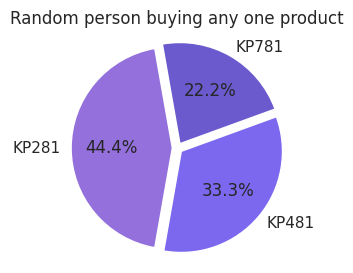

In [ ]:
dic={'KP281':x,'KP481':x0,'KP781':x1}
labels = dic.keys()
sizes = dic.values()
colors = [medium_purple, dark_slate_blue, slate_blue]
explode = (0.05, 0.05, 0.05)

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=100, explode=explode)
plt.title('Random person buying any one product')
plt.axis('equal')
plt.plot()

###**How age is affecting choice of product**

In [ ]:
data405=pd.crosstab(data40['Product'],data40['Age_dis'],values="Product",aggfunc='count',margins=True)
data405

Age_dis,Stage1,Stage2,Stage3,All
Product,,,,
KP281,41,20,19,80
KP481,31,14,15,60
KP781,19,13,8,40
All,91,47,42,180


In [ ]:
# Probability of a Stage1 aged individual
ag=data405.loc['All','Stage1']/data405.loc['All','All']
ag=round(ag,2)

#Probability of a Stage1 aged individual buying KP281
ag0=data405.loc['KP281','Stage1']/data405.loc['All','Stage1']
ag0=round(ag0,2)

#Probability of a Stage1 aged individual buying KP481
ag1=data405.loc['KP481','Stage1']/data405.loc['All','Stage1']
ag1=round(ag1,3)

#Probability of a Stage1 aged individual buying KP781
ag2=data405.loc['KP781','Stage1']/data405.loc['All','Stage1']
ag2=round(ag2,2)
print(f"The probability of a Stage1 aged is:{ag}\nThe probability of Stage1 aged individual buying KP281 is: {ag0}\nThe probability of Stage1 aged individual buying KP481 is: {ag1}\nThe probability of Stage1 aged individual buying KP781 is: {ag2}")


The probability of a Stage1 aged is:0.51
The probability of Stage1 aged individual buying KP281 is: 0.45
The probability of Stage1 aged individual buying KP481 is: 0.341
The probability of Stage1 aged individual buying KP781 is: 0.21


In [ ]:
# Probability of a Stage2 aged individual
st=data405.loc['All','Stage2']/data405.loc['All','All']
st=round(st,2)

#Probability of a Stage2 aged individual buying KP281
st0=data405.loc['KP281','Stage2']/data405.loc['All','Stage2']
st0=round(st0,2)

#Probability of a Stage1 aged individual buying KP481
st1=data405.loc['KP481','Stage2']/data405.loc['All','Stage2']
st1=round(st1,3)

#Probability of a Stage1 aged individual buying KP781
st2=data405.loc['KP781','Stage2']/data405.loc['All','Stage2']
st2=round(st2,2)
print(f"The probability of a Stage2 aged :{st}\nThe probability of Stage2 aged individual buying KP281 is: {st0}\nThe probability of Stage2 aged individual buying KP481 is: {st1}\nThe probability of Stage2 aged individual buying KP781 is: {st2}")


The probability of a Stage2 aged :0.26
The probability of Stage2 aged individual buying KP281 is: 0.43
The probability of Stage2 aged individual buying KP481 is: 0.298
The probability of Stage2 aged individual buying KP781 is: 0.28


In [ ]:
# Probability of a Stage3 aged individual
stt=data405.loc['All','Stage3']/data405.loc['All','All']
stt=round(stt,2)

#Probability of a Stage2 aged individual buying KP281
stt0=data405.loc['KP281','Stage3']/data405.loc['All','Stage3']
stt0=round(stt0,2)

#Probability of a Stage1 aged individual buying KP481
stt1=data405.loc['KP481','Stage3']/data405.loc['All','Stage3']
stt1=round(stt1,3)

#Probability of a Stage1 aged individual buying KP781
stt2=data405.loc['KP781','Stage3']/data405.loc['All','Stage3']
stt2=round(stt2,2)
print(f"The probability of a Stage3 aged individual:{stt}\nThe probability of Stage3 aged individual buying KP281 is: {stt0}\nThe probability of Stage3 aged individual buying KP481 is: {stt1}\nThe probability of Stage3 aged individual buying KP781 is: {stt2}")


The probability of a Stage3 aged individual:0.23
The probability of Stage3 aged individual buying KP281 is: 0.45
The probability of Stage3 aged individual buying KP481 is: 0.357
The probability of Stage3 aged individual buying KP781 is: 0.19


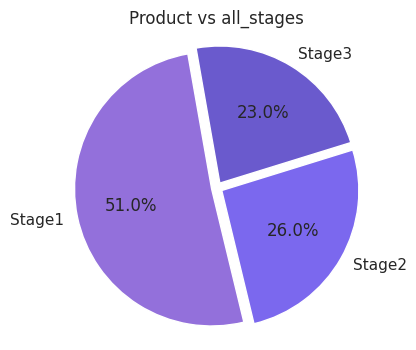

In [ ]:
overall={'Stage1':ag,'Stage2':st,'Stage3':stt}
labels=overall.keys()
sizes=overall.values()
colors = [medium_purple, dark_slate_blue, slate_blue]
explode = (0.04, 0.04, 0.04)
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=100, explode=explode)
plt.axis('equal')

plt.title('Product vs all_stages')
plt.show()

[]

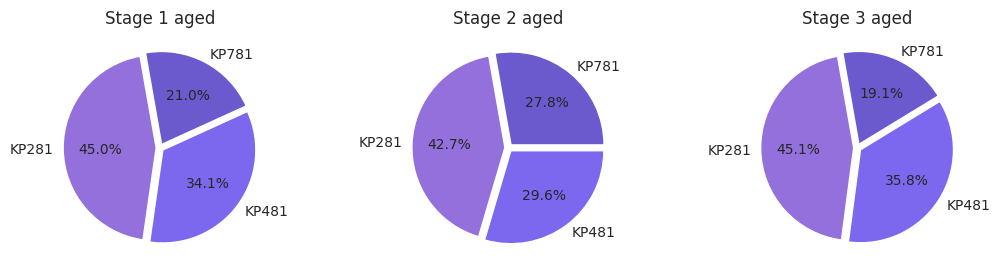

In [ ]:
First={'KP281':ag0,'KP481':ag1,'KP781':ag2}
Second={'KP281':st0,'KP481':st1,'KP781':st2}
Third={'KP281':stt0,'KP481':stt1,'KP781':stt2}
labels0 = First.keys()
sizes0 = First.values()
labels1= Second.keys()
sizes1 = Second.values()
labels2 = Third.keys()
sizes2= Third.values()

colors = [medium_purple, dark_slate_blue, slate_blue]
explode = (0.04, 0.04, 0.04)

fig, axes = plt.subplots(1, 3, figsize=(12, 6), gridspec_kw={'wspace': 0.5})

# Subplot 1
axes[0].pie(sizes0, labels=labels0, colors=colors, autopct='%1.1f%%',startangle=100,explode=explode,textprops={'fontsize': 10})
axes[0].set_title("Stage 1 aged")

# # Subplot 2
axes[1].pie(sizes1, labels=labels1, colors=colors, autopct='%1.1f%%',startangle=100,explode=explode,textprops={'fontsize': 10})
axes[1].set_title("Stage 2 aged")

axes[2].pie(sizes2, labels=labels2, colors=colors, autopct='%1.1f%%',startangle=100,explode=explode,textprops={'fontsize': 10})
axes[2].set_title("Stage 3 aged")

plt.plot()

###**Let's see how gender affects purchase of a product**

In [ ]:
data401=pd.crosstab(data40['Product'],data40['Gender'],values='Product',aggfunc='count',margins=True)
data401

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


***For male***

In [ ]:
#Probability of a male
m=data401.loc['All','Male']/data401.loc['All','All']
m=round(m,2)

#Probability of a Male buying KP281
m0=data401.loc['KP281','Male']/data401.loc['All','Male']
m0=round(m0,2)

#Probability of a Male buying KP481
m1=data401.loc['KP481','Male']/data401.loc['All','Male']
m1=round(m1,3)

#Probability of a Male buying KP781
m2=data401.loc['KP781','Male']/data401.loc['All','Male']
m2=round(m2,2)
print(f"The probability of a male buying a product is:{m}\nThe probability of male buying KP281 is: {m0}\nThe probability of male buying KP481 is: {m1}\nThe probability of male buying KP781 is: {m2}")


The probability of a male buying a product is:0.58
The probability of male buying KP281 is: 0.38
The probability of male buying KP481 is: 0.298
The probability of male buying KP781 is: 0.32


***For Female***

In [ ]:
#Probability of a Female
f=data401.loc['All','Female']/data401.loc['All','All']
f=round(f,2)

#Probability of a Female buying KP281
f0=data401.loc['KP281','Female']/data401.loc['All','Female']
f0=round(f0,2)

#Probability of a Female buying KP481
f1=data401.loc['KP481','Female']/data401.loc['All','Female']
f1=round(f1,2)

#Probability of a Female buying KP781
f2=data401.loc['KP781','Female']/data401.loc['All','Female']
f2=round(f2,2)
print(f"The probability of a Female buying a product is:{f}\nThe probability of Female buying KP281 is: {f0}\nThe probability of Female buying KP481 is: {f1}\nThe probability of Female buying KP781 is: {f2}")


The probability of a Female buying a product is:0.42
The probability of Female buying KP281 is: 0.53
The probability of Female buying KP481 is: 0.38
The probability of Female buying KP781 is: 0.09


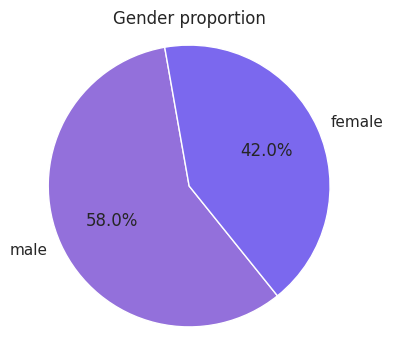

In [ ]:
overall={'male':m,'female':f}
labels=overall.keys()
sizes=overall.values()
colors = [medium_purple, dark_slate_blue, slate_blue]
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=100)
plt.axis('equal')

plt.title('Gender proportion')
plt.show()

[]

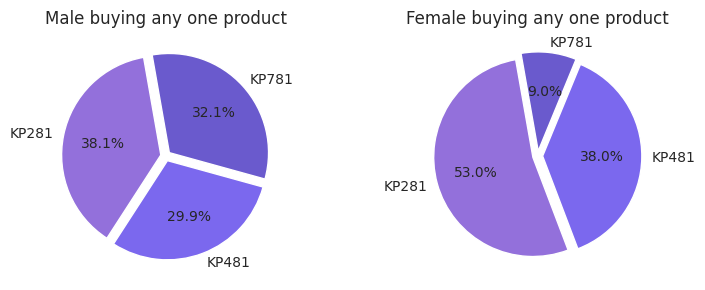

In [ ]:
male={'KP281':m0,'KP481':m1,'KP781':m2}
female={'KP281':f0,'KP481':f1,'KP781':f2}
labels0 = male.keys()
sizes0 = male.values()
labels1= female.keys()
sizes1 = female.values()
colors = [medium_purple, dark_slate_blue, slate_blue]
explode = (0.05, 0.05, 0.05)

fig, axes = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'wspace': 0.5})


axes[0].pie(sizes0, labels=labels0, colors=colors, autopct='%1.1f%%',startangle=100,explode=explode,textprops={'fontsize': 10})
axes[0].set_title("Male buying any one product")

axes[1].pie(sizes1, labels=labels1, colors=colors, autopct='%1.1f%%',startangle=100,explode=explode,textprops={'fontsize': 10})
axes[1].set_title("Female buying any one product")


plt.plot()

###**How marital status affects a general person in buying a product**

In [ ]:
data402=pd.crosstab(data40['Product'],data40['MaritalStatus'],values='Product',aggfunc='count',margins=True)
data402

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [ ]:
# Probability of a Partnered individual
p=data402.loc['All','Partnered']/data402.loc['All','All']
p=round(p,2)

#Probability of a Partnered individual buying KP281
p0=data402.loc['KP281','Partnered']/data402.loc['All','Partnered']
p0=round(p0,2)

#Probability of a Partnered individual buying KP481
p1=data402.loc['KP481','Partnered']/data402.loc['All','Partnered']
p1=round(p1,3)

#Probability of a Partnered individual buying KP781
p2=data402.loc['KP781','Partnered']/data402.loc['All','Partnered']
p2=round(p2,2)
print(f"The probability of a Partnered individual:{p}\nThe probability of Partnered individual buying KP281 is: {p0}\nThe probability of Partnered individual buying KP481 is: {p1}\nThe probability of Partnered individual buying KP781 is: {p2}")


The probability of a Partnered individual:0.59
The probability of Partnered individual buying KP281 is: 0.45
The probability of Partnered individual buying KP481 is: 0.336
The probability of Partnered individual buying KP781 is: 0.21


In [ ]:
# Probability of a Single individual
s=data402.loc['All','Single']/data402.loc['All','All']
s=round(s,2)

#Probability of a Single individual buying KP281
s0= data402.loc['KP281','Single']/data402.loc['All','Single']
s0=round(s0,2)

#Probability of a Single individual buying KP481
s1=data402.loc['KP481','Single']/data402.loc['All','Single']
s1=round(s1,3)

#Probability of a Single individual buying KP781
s2=data402.loc['KP781','Single']/data402.loc['All','Single']
s2=round(s2,2)
print(f"The probability of a Single individual:{s}\nThe probability of Single individual buying KP281 is: {s0}\nThe probability of Single individuall buying KP481 is: {s1}\nThe probability of Single individual buying KP781 is: {s2}")


The probability of a Single individual:0.41
The probability of Single individual buying KP281 is: 0.44
The probability of Single individuall buying KP481 is: 0.329
The probability of Single individual buying KP781 is: 0.23


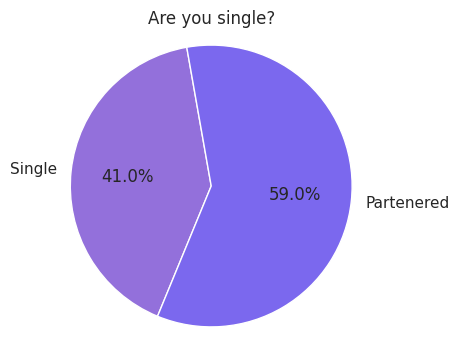

In [ ]:
overall={'Single':s,'Partenered':p}
labels=overall.keys()
sizes=overall.values()
colors = [medium_purple, dark_slate_blue, slate_blue]
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=100)
plt.axis('equal')

plt.title('Are you single?')
plt.show()

[]

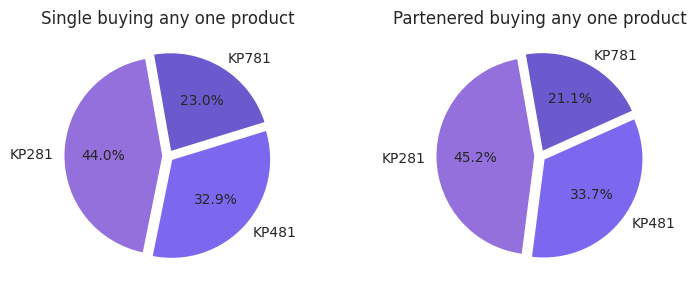

In [ ]:
Single={'KP281':s0,'KP481':s1,'KP781':s2}
Partenered={'KP281':p0,'KP481':p1,'KP781':p2}
labels0 = Single.keys()
sizes0 = Single.values()
labels1= Partenered.keys()
sizes1 = Partenered.values()
colors = [medium_purple, dark_slate_blue, slate_blue]
explode = (0.05, 0.05, 0.05)

fig, axes = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'wspace': 0.5})

# Subplot 1
axes[0].pie(sizes0, labels=labels0, colors=colors, autopct='%1.1f%%',startangle=100,explode=explode,textprops={'fontsize': 10})
axes[0].set_title("Single buying any one product")

# # Subplot 2
axes[1].pie(sizes1, labels=labels1, colors=colors, autopct='%1.1f%%',startangle=100,explode=explode,textprops={'fontsize': 10})
axes[1].set_title("Partenered buying any one product")

plt.plot()

In [ ]:
data40.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Category,Miles_cat,Age_dis
0,KP281,18,Male,14,Single,3,4,29562,112,Low_Income,Marathonr,Stage1
1,KP281,19,Male,15,Single,2,3,31836,75,Low_Income,Short,Stage1
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low_Income,Short,Stage1
3,KP281,19,Male,12,Single,3,3,32973,85,Low_Income,Short,Stage1
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low_Income,Short,Stage1


###**Fitness vs product**

In [ ]:
data406=pd.crosstab(data40['Product'],data40['Fitness'],values='Product',aggfunc='count')
data406.fillna(0,inplace=True)
data406

Fitness,1,2,3,4,5
Product,,,,,
KP281,1.0,14.0,54.0,9.0,2.0
KP481,1.0,12.0,39.0,8.0,0.0
KP781,0.0,0.0,4.0,7.0,29.0


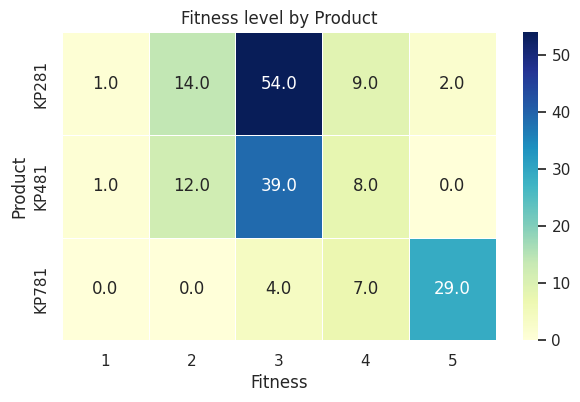

In [ ]:
plt.figure(figsize=(7, 4))
sns.set(font_scale=1)  # Optional: Adjust font size
sns.heatmap(data406, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5, cbar=True)

plt.xlabel('Fitness')
plt.ylabel('Product')
plt.title('Fitness level by Product')

plt.show()

###**How Income_Category' determine usage of product**

In [ ]:
data403=pd.crosstab(data40['Product'],data40['Income_Category'],values='Product',aggfunc='count',margins=True)
data403.fillna(0,inplace=True)
data403

Income_Category,Average_Income,High_Income,Low_Income,All
Product,,,,
KP281,32.0,0.0,48.0,80
KP481,30.0,0.0,30.0,60
KP781,16.0,19.0,5.0,40
All,78.0,19.0,83.0,180


In [ ]:
# Probability of a Low_Income individual
i=data403.loc['All','Low_Income']/data403.loc['All','All']
i=round(i,2)

#Probability of a Low_Income individual buying KP281
i0=data403.loc['KP281','Low_Income']/data403.loc['All','Low_Income']
i0=round(i0,2)

#Probability of a Low_Income individual buying KP481
i1=data403.loc['KP481','Low_Income']/data403.loc['All','Low_Income']
i1=round(i1,3)

#Probability of a Low_Income individual buying KP781
i2=data403.loc['KP781','Low_Income']/data403.loc['All','Low_Income']
i2=round(i2,2)
print(f"The probability of a Low_Income individual is:{i}\nThe probability of Low_Income individual buying KP281 is: {i0}\nThe probability of Low_Income individual buying KP481 is: {i1}\nThe probability of Low_Income individual buying KP781 is: {i2}")


The probability of a Low_Income individual is:0.46
The probability of Low_Income individual buying KP281 is: 0.58
The probability of Low_Income individual buying KP481 is: 0.361
The probability of Low_Income individual buying KP781 is: 0.06


In [ ]:
# Probability of a Average_Income individual
av=data403.loc['All','Average_Income']/data403.loc['All','All']
av=round(av,2)

#Probability of a Average_Income individual buying KP281
av0=data403.loc['KP281','Average_Income']/data403.loc['All','Average_Income']
av0=round(av0,2)

#Probability of a Average_Income individual buying KP481
av1=data403.loc['KP481','Average_Income']/data403.loc['All','Average_Income']
av1=round(av1,3)

#Probability of a Average_Income individual buying KP781
av2=data403.loc['KP781','Average_Income']/data403.loc['All','Average_Income']
av2=round(av2,2)
print(f"The probability of a Average_Income individual is:{av}\nThe probability of Average_Income individual buying KP281 is: {av0}\nThe probability of Average_Income individual buying KP481 is: {av1}\nThe probability of Average_Income individual buying KP781 is: {av2}")


The probability of a Average_Income individual is:0.43
The probability of Average_Income individual buying KP281 is: 0.41
The probability of Average_Income individual buying KP481 is: 0.385
The probability of Average_Income individual buying KP781 is: 0.21


In [ ]:
# Probability of a High_Income individual
h=data403.loc['All','High_Income']/data403.loc['All','All']
h=round(h,2)

#Probability of a High_Income individual buying KP281
h0=data403.loc['KP281','High_Income']/data403.loc['All','High_Income']
h0=round(h0,2)

#Probability of a High_Income individual buying KP481
h1=data403.loc['KP481','High_Income']/data403.loc['All','High_Income']
h1=round(h1,3)

#Probability of a High_Income individual buying KP781
h2=data403.loc['KP781','High_Income']/data403.loc['All','High_Income']
h2=round(h2,2)
print(f"The probability of a High_Income individual is:{h}\nThe probability of High_Income individual buying KP281 is: {h0}\nThe probability of High_Income individual buying KP481 is: {h1}\nThe probability of Low_Income individual buying KP781 is: {h2}")


The probability of a High_Income individual is:0.11
The probability of High_Income individual buying KP281 is: 0.0
The probability of High_Income individual buying KP481 is: 0.0
The probability of Low_Income individual buying KP781 is: 1.0


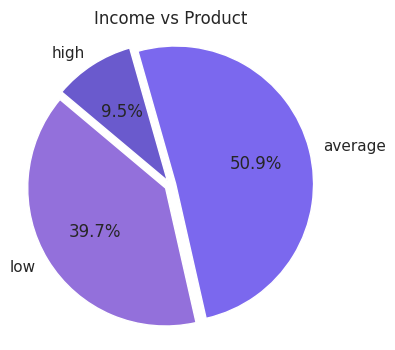

In [ ]:
overall={'low':i,'average':p,'high':h}
labels=overall.keys()
sizes=overall.values()
colors = [medium_purple, dark_slate_blue, slate_blue]
plt.figure(figsize=(4, 4))
explode = (0.04, 0.04, 0.04)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,explode=explode)
plt.axis('equal')

plt.title('Income vs Product')
plt.show()

[]

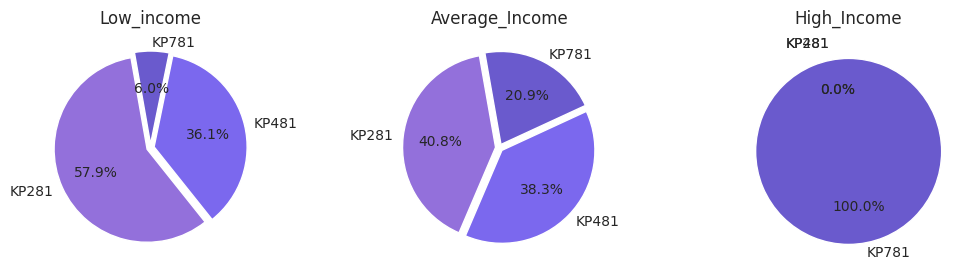

In [ ]:
low={'KP281':i0,'KP481':i1,'KP781':i2}
Average={'KP281':av0,'KP481':av1,'KP781':av2}
high={'KP281':h0,'KP481':h1,'KP781':h2}
labels0 = low.keys()
sizes0 = low.values()
labels1= Average.keys()
sizes1 = Average.values()
labels2 = high.keys()
sizes2= high.values()

colors = [medium_purple, dark_slate_blue, slate_blue]
explode = (0.04, 0.04, 0.04)

fig, axes = plt.subplots(1, 3, figsize=(12, 6), gridspec_kw={'wspace': 0.5})

# Subplot 1
axes[0].pie(sizes0, labels=labels0, colors=colors, autopct='%1.1f%%',startangle=100,explode=explode,textprops={'fontsize': 10})
axes[0].set_title("Low_income")

# # Subplot 2
axes[1].pie(sizes1, labels=labels1, colors=colors, autopct='%1.1f%%',startangle=100,explode=explode,textprops={'fontsize': 10})
axes[1].set_title("Average_Income")

axes[2].pie(sizes2, labels=labels2, colors=colors, autopct='%1.1f%%',startangle=100,explode=explode,textprops={'fontsize': 10})
axes[2].set_title("High_Income")

plt.plot()

###**Which product different runner prefers**

In [ ]:
data404=pd.crosstab(data40['Product'],data40['Miles_cat'],values="Product",aggfunc='count',margins=True)
data404

Miles_cat,Marathonr,Short,Ultra_Marathon,All
Product,,,,
KP281,17,62,1,80
KP481,15,44,1,60
KP781,21,8,11,40
All,53,114,13,180


In [ ]:
# Probability of a Marathonr individual
r=data404.loc['All','Marathonr']/data404.loc['All','All']
r=round(r,2)

#Probability of a Marathon individual buying KP281
r0=data404.loc['KP281','Marathonr']/data404.loc['All','Marathonr']
r0=round(r0,2)

#Probability of a Marathon individual buying KP481
r1=data404.loc['KP481','Marathonr']/data404.loc['All','Marathonr']
r1=round(r1,3)

#Probability of a Marathon individual buying KP781
r2=data404.loc['KP781','Marathonr']/data404.loc['All','Marathonr']
r2=round(r2,2)
print(f"The probability of a Marathon individual is:{r}\nThe probability of Marathonr individual buying KP281 is: {r0}\nThe probability of Marathonr individual buying KP481 is: {r1}\nThe probability of Marathonr individual buying KP781 is: {r2}")


The probability of a Marathon individual is:0.29
The probability of Marathonr individual buying KP281 is: 0.32
The probability of Marathonr individual buying KP481 is: 0.283
The probability of Marathonr individual buying KP781 is: 0.4


In [ ]:
# Probability of a Short runner individual
sh=data404.loc['All','Short']/data404.loc['All','All']
sh=round(sh,2)

#Probability of a Short runner individual buying KP281
sh0=data404.loc['KP281','Short']/data404.loc['All','Short']
sh0=round(sh0,2)

#Probability of a Short runner individual buying KP481
sh1=data404.loc['KP481','Short']/data404.loc['All','Short']
sh1=round(sh1,3)

#Probability of a Short runner individual buying KP781
sh2=data404.loc['KP781','Short']/data404.loc['All','Short']
sh2=round(sh2,2)
print(f"The probability of a Short runner individual is:{sh}\nThe probability of Short runner individual buying KP281 is: {sh0}\nThe probability of Short runner individual buying KP481 is: {sh1}\nThe probability of Short runner individual buying KP781 is: {sh2}")


The probability of a Short runner individual is:0.63
The probability of Short runner individual buying KP281 is: 0.54
The probability of Short runner individual buying KP481 is: 0.386
The probability of Short runner individual buying KP781 is: 0.07


In [ ]:
# Probability of a Ultra_Marathon runner individual
um=data404.loc['All','Ultra_Marathon']/data404.loc['All','All']
um=round(um,2)

#Probability of a Ultra_Marathon runner individual buying KP281
um0=data404.loc['KP281','Ultra_Marathon']/data404.loc['All','Ultra_Marathon']
um0=round(um0,2)

#Probability of a Ultra_Marathon runner individual buying KP481
um1=data404.loc['KP481','Ultra_Marathon']/data404.loc['All','Ultra_Marathon']
um1=round(um1,3)

#Probability of a Ultra_Marathon runner individual buying KP781
um2=data404.loc['KP781','Ultra_Marathon']/data404.loc['All','Ultra_Marathon']
um2=round(um2,2)
print(f"The probability of a Ultra_Marathon runner individual buying a product is:{um}\nThe probability of Ultra_Marathon runner individual buying KP281 is: {um0}\nThe probability of Ultra_Marathon runner individual buying KP481 is: {um}\nThe probability of Ultra_Marathon runner individual buying KP781 is: {um2}")


The probability of a Ultra_Marathon runner individual buying a product is:0.07
The probability of Ultra_Marathon runner individual buying KP281 is: 0.08
The probability of Ultra_Marathon runner individual buying KP481 is: 0.07
The probability of Ultra_Marathon runner individual buying KP781 is: 0.85


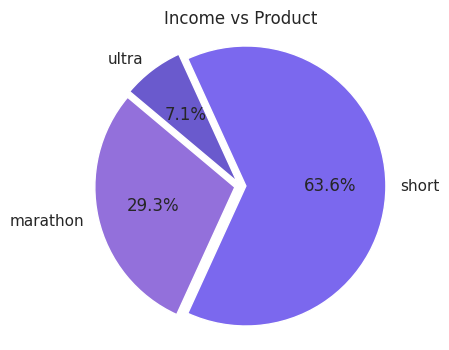

In [ ]:
overall={'marathon':r,'short':sh,'ultra':um}
labels=overall.keys()
sizes=overall.values()
colors = [medium_purple, dark_slate_blue, slate_blue]
plt.figure(figsize=(4, 4))
explode = (0.04, 0.04, 0.04)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,explode=explode)
plt.axis('equal')

plt.title('Income vs Product')
plt.show()

[]

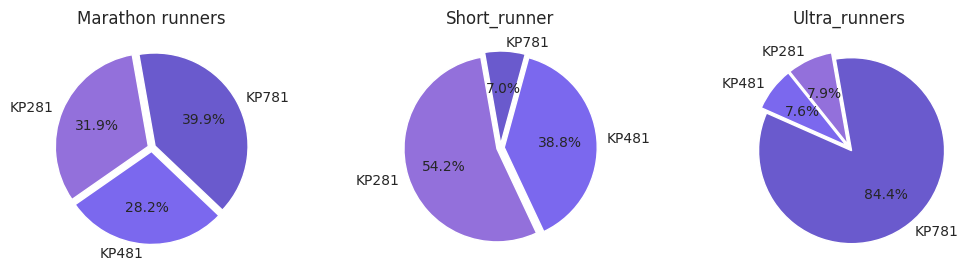

In [ ]:
marath={'KP281':r0,'KP481':r1,'KP781':r2}
short={'KP281':sh0,'KP481':sh1,'KP781':sh2}
ultra={'KP281':um0,'KP481':um1,'KP781':um2}
labels0 = marath.keys()
sizes0 = marath.values()
labels1= short.keys()
sizes1 = short.values()
labels2 = ultra.keys()
sizes2= ultra.values()

colors = [medium_purple, dark_slate_blue, slate_blue]
explode = (0.04, 0.04, 0.04)

fig, axes = plt.subplots(1, 3, figsize=(12, 6), gridspec_kw={'wspace': 0.5})

# Subplot 1
axes[0].pie(sizes0, labels=labels0, colors=colors, autopct='%1.1f%%',startangle=100,explode=explode,textprops={'fontsize': 10})
axes[0].set_title("Marathon runners")

# # Subplot 2
axes[1].pie(sizes1, labels=labels1, colors=colors, autopct='%1.1f%%',startangle=100,explode=explode,textprops={'fontsize': 10})
axes[1].set_title("Short_runner")

axes[2].pie(sizes2, labels=labels2, colors=colors, autopct='%1.1f%%',startangle=100,explode=explode,textprops={'fontsize': 10})
axes[2].set_title("Ultra_runners")

plt.plot()